## Rule Based Sentiment Analysis


### 1. VADER

(Valence Aware Dictionary and sEntiment Reasoner)

In [1]:
pip install nltk vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install nltk vaderSentiment


In [3]:
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

df = pd.read_csv('raw_reviews.csv')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\priti.mujbaile\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Word cloud on Raw data

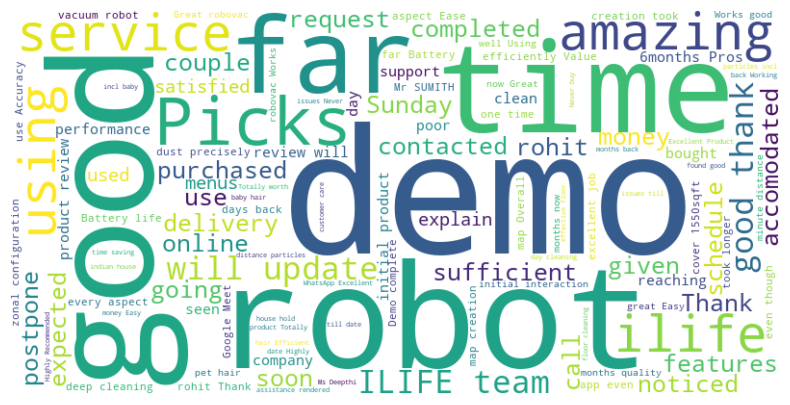

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combine all text into one string
text = " ".join(df['body'].dropna())

# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text)

# Show
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [4]:
def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'\s+', ' ', text)
    return text


In [5]:
analyzer = SentimentIntensityAnalyzer()


In [6]:
df['review_sentiment'] = df['body'].apply(analyzer.polarity_scores)
df[['body', 'review_sentiment']]

,body,review_sentiment
0,"It's the initial product review, will update a...","{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp..."
1,Demo complete by rohit Thank you rohit demo al...,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp..."
2,We purchased this vacuum robot a few days back...,"{'neg': 0.016, 'neu': 0.911, 'pos': 0.073, 'co..."
3,We have been using it for a few months now. Gr...,"{'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'comp..."
4,Using since 3 months ... quality was good and ...,"{'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'comp..."
...,...,...
65,This robot is great for indian house hold this...,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp..."
66,So far so good- Thanks to Ms Deepthi from cust...,"{'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'comp..."
67,Excellent Product ... I bought it few months b...,"{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp..."
68,The Product is very poor and there is no suppo...,"{'neg': 0.186, 'neu': 0.665, 'pos': 0.15, 'com..."


### Conver Scrore to Label

In [31]:
def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['V_review_sentiment'] = df['body'].apply(get_sentiment)
df[['body', 'V_review_sentiment']]

# Load CSV files
new_df = pd.read_csv("Traning_Data.csv")

# Transfer only required columns from raw CSV
new_df[['body', 'review_sentiment']] = df[['body', 'V_review_sentiment']]


# Save final CSV
new_df.to_csv("final_sentiment_report.csv", index=False)

df_for_WC = pd.read_csv("final_sentiment_report.csv")

In [25]:
df[['body', 'V_review_sentiment']]


,body,V_review_sentiment
0,"It's the initial product review, will update a...",Positive
1,Demo complete by rohit Thank you rohit demo al...,Positive
2,We purchased this vacuum robot a few days back...,Positive
3,We have been using it for a few months now. Gr...,Positive
4,Using since 3 months ... quality was good and ...,Positive
...,...,...
65,This robot is great for indian house hold this...,Positive
66,So far so good- Thanks to Ms Deepthi from cust...,Positive
67,Excellent Product ... I bought it few months b...,Positive
68,The Product is very poor and there is no suppo...,Negative


### Word Cloud for the Positive and Negative words

In [22]:
!pip install pandas wordcloud matplotlib nltk


In [33]:
print(df['V_review_sentiment'].value_counts())


V_review_sentiment
Positive    63
Negative     7
Name: count, dtype: int64


In [34]:
df['V_review_sentiment'] = df['V_review_sentiment'].str.lower().str.strip()


In [35]:
df['body'] = df['body'].astype(str)


In [36]:
positive_text = " ".join(df[df['V_review_sentiment'] == 'positive']['body'])
negative_text = " ".join(df[df['V_review_sentiment'] == 'negative']['body'])

print("Positive text length:", len(positive_text))
print("Negative text length:", len(negative_text))


Positive text length: 12501
Negative text length: 860


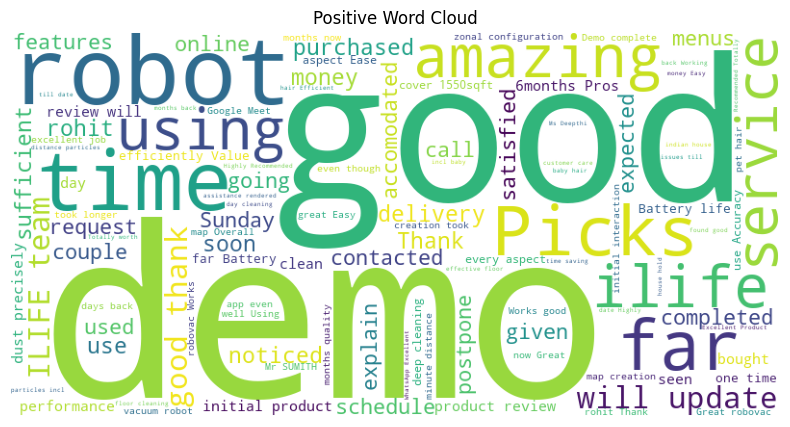

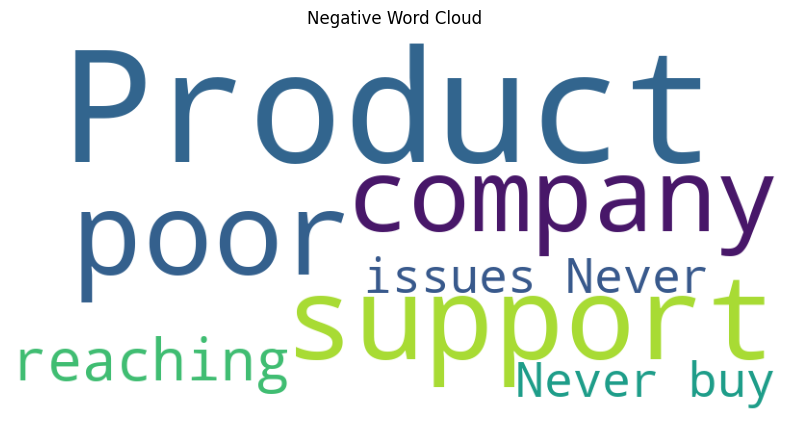

In [37]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Clean sentiment column
df['V_review_sentiment'] = df['V_review_sentiment'].str.lower().str.strip()

# Ensure text column is string
df['body'] = df['body'].astype(str)

stopwords = set(STOPWORDS)

# Separate text
positive_text = " ".join(df[df['V_review_sentiment'] == 'positive']['body'])
negative_text = " ".join(df[df['V_review_sentiment'] == 'negative']['body'])

# Positive Word Cloud
if positive_text.strip():
    pos_wc = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=800,
        height=400
    ).generate(positive_text)

    plt.figure(figsize=(10,5))
    plt.imshow(pos_wc)
    plt.axis('off')
    plt.title("Positive Word Cloud")
    plt.show()
else:
    print("No positive reviews found!")

# Negative Word Cloud
if negative_text.strip():
    neg_wc = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=800,
        height=400
    ).generate(negative_text)

    plt.figure(figsize=(10,5))
    plt.imshow(neg_wc)
    plt.axis('off')
    plt.title("Negative Word Cloud")
    plt.show()
else:
    print("No negative reviews found!")


### 2. Textblob

In [8]:
!pip install textblob
!python -m textblob.download_corpora


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\priti.mujbaile\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\priti.mujbaile\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\priti.mujbaile\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\priti.mujbaile\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\priti.mujbaile\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\priti.mujbaile\AppData\Roaming\n

In [9]:
!pip install textblob
!pip install textblob.download_corpora


ERROR: Could not find a version that satisfies the requirement textblob.download_corpora (from versions: none)
ERROR: No matching distribution found for textblob.download_corpora


In [17]:
from textblob import TextBlob

# text = "The product quality is excellent and worth the price"

# blob = TextBlob(text)
# sentiment = blob.sentiment
df['review_sentiment'] = df['body'].apply(TextBlob)




In [15]:
def get_sentiment_label(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"
df['TB_review_sentiment'] = df['body'].apply(get_sentiment_label)
df[['body', 'TB_review_sentiment']]



,body,TB_review_sentiment
0,"It's the initial product review, will update a...",Positive
1,Demo complete by rohit Thank you rohit demo al...,Positive
2,We purchased this vacuum robot a few days back...,Positive
3,We have been using it for a few months now. Gr...,Positive
4,Using since 3 months ... quality was good and ...,Positive
...,...,...
65,This robot is great for indian house hold this...,Positive
66,So far so good- Thanks to Ms Deepthi from cust...,Positive
67,Excellent Product ... I bought it few months b...,Positive
68,The Product is very poor and there is no suppo...,Negative


In [19]:
df["Match"] = df["V_review_sentiment"] == df["TB_review_sentiment"]

df[["TB_review_sentiment","V_review_sentiment","Match"] ]

,TB_review_sentiment,V_review_sentiment,Match
0,Positive,Positive,True
1,Positive,Positive,True
2,Positive,Positive,True
3,Positive,Positive,True
4,Positive,Positive,True
...,...,...,...
65,Positive,Positive,True
66,Positive,Positive,True
67,Positive,Positive,True
68,Negative,Negative,True


In [22]:
true_count = (df["Match"] == True).sum()
false_count = (df["Match"] == False).sum()
total = len(df)

true_percent = (true_count / total) * 100
false_percent = (false_count / total) * 100

print(f"True (Match) Percentage: {true_percent:.2f}%")
print(f"False (Mismatch) Percentage: {false_percent:.2f}%")



True (Match) Percentage: 100.00%
False (Mismatch) Percentage: 0.00%
